# Delivery DataSet

## problem statement

[x]  Type of Orders.

[x]  Delivery Person Age.

[x]  Longest Time consuming delivery.

[x]  Type of vehicle used in delivery. 

[x]  Find highst rating of vehicle.



## Load the modules

In [22]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print('loaded')

loaded


## Load csv file into DataFrame

In [2]:
df = pd.read_csv("deliverytime.csv")
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


## Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [4]:
df.isnull().count()

ID                             45593
Delivery_person_ID             45593
Delivery_person_Age            45593
Delivery_person_Ratings        45593
Restaurant_latitude            45593
Restaurant_longitude           45593
Delivery_location_latitude     45593
Delivery_location_longitude    45593
Type_of_order                  45593
Type_of_vehicle                45593
Time_taken(min)                45593
dtype: int64

In [5]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


### Data is clean !

## 1. Type of Orders.

In [6]:
sns.set_style('darkgrid')

In [7]:
order_types_values =df['Type_of_order'].value_counts()
order_types_values

Type_of_order
Snack      11533
Meal       11458
Drinks     11322
Buffet     11280
Name: count, dtype: int64

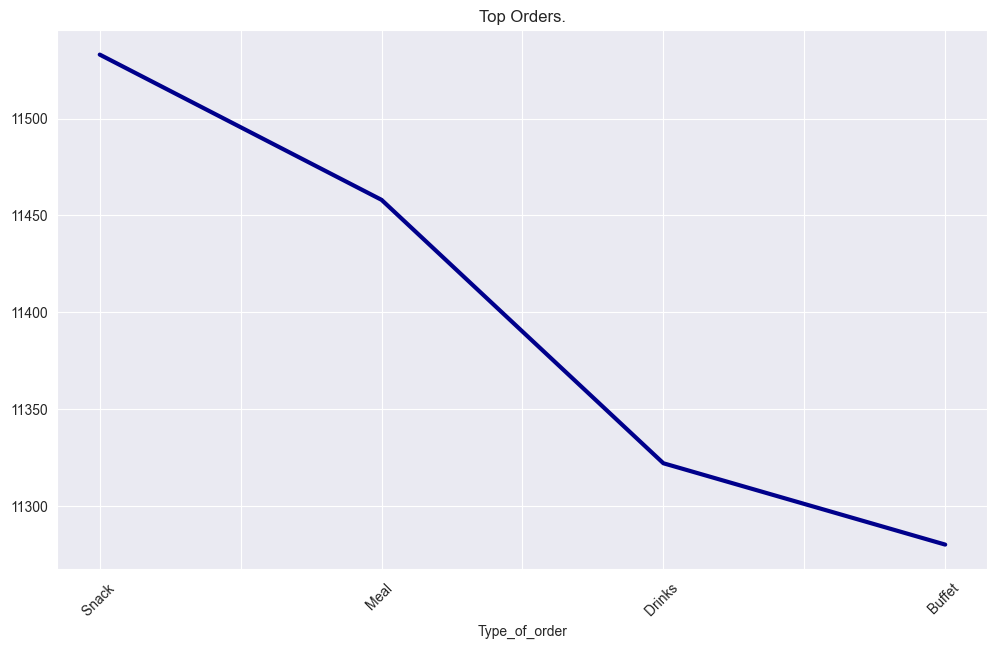

In [8]:
plt.figure(figsize = (12,7))
order_types_values.plot(kind = 'line',title = 'Top Orders.',color = 'darkblue',lw = 3)
plt.xticks(rotation = 45)
plt.show()

### The Snacks are Highly Ordered By the Customers..

## Delivery Person Age.

In [9]:
delivery_person_age = df[['Delivery_person_Age']].sort_values(by='Delivery_person_Age',ascending = True)
delivery_person_age.describe()

,Delivery_person_Age
count,45593.000000
mean,29.544075
std,5.696793
min,15.000000
25%,25.000000
50%,29.000000
75%,34.000000
max,50.000000


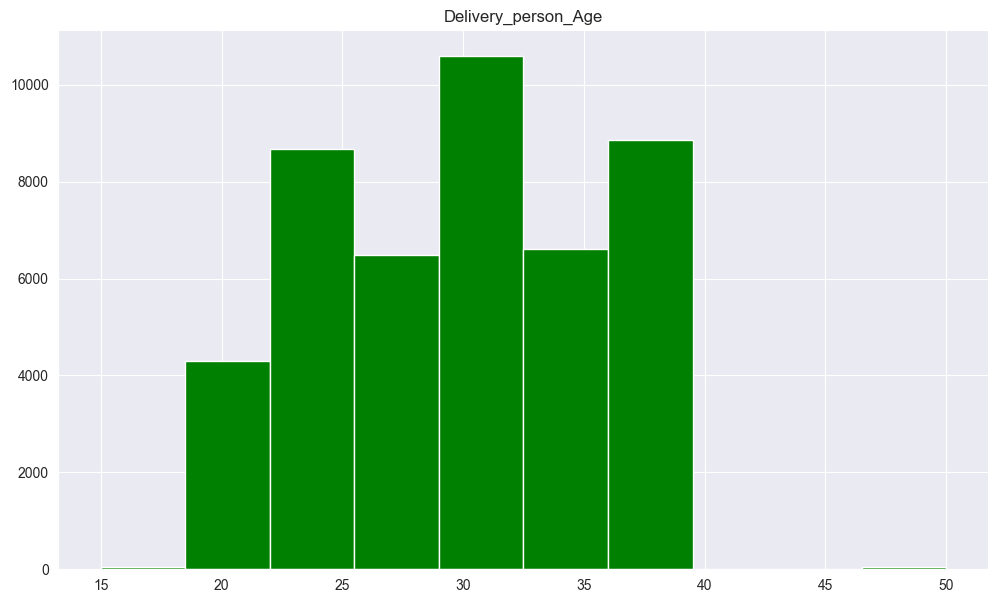

In [10]:
plt.figure(figsize = (12,7))
plt.hist(delivery_person_age,bins = 10,color = 'green',)
plt.title("Delivery_person_Age")
plt.show()

### Most of People are Age 30..

## Longest Time consuming delivery.

In [11]:
ltime_deli = df[['Time_taken(min)']].sort_values(by = 'Time_taken(min)',ascending = True)
ltime_deli.describe()

,Time_taken(min)
count,45593.000000
mean,26.294607
std,9.383806
min,10.000000
25%,19.000000
50%,26.000000
75%,32.000000
max,54.000000


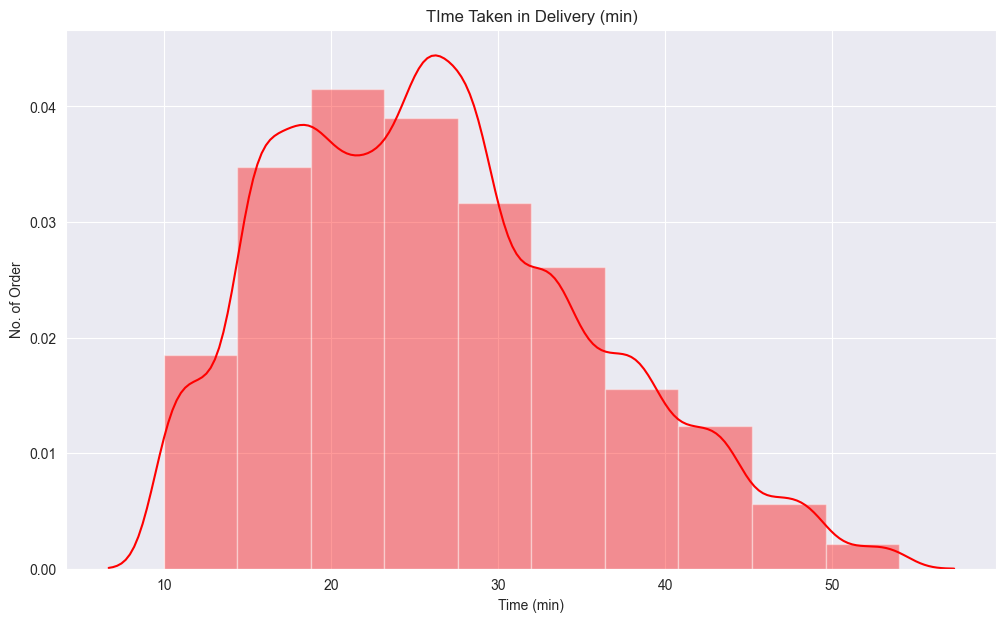

In [23]:
plt.figure(figsize = (12,7))
sns.distplot(ltime_deli,bins = 10,color = 'r');
plt.ylabel('No. of Order')
plt.xlabel('Time (min)')
plt.title("TIme Taken in Delivery (min)");
plt.show();

### The Highest Time of Delivery is 50-55 min is there

## type of vehicle used in delivery.

In [13]:
vc_types = df[['Type_of_vehicle']].value_counts()
vc_types

Type_of_vehicle  
motorcycle           26435
scooter              15276
electric_scooter      3814
bicycle                 68
Name: count, dtype: int64

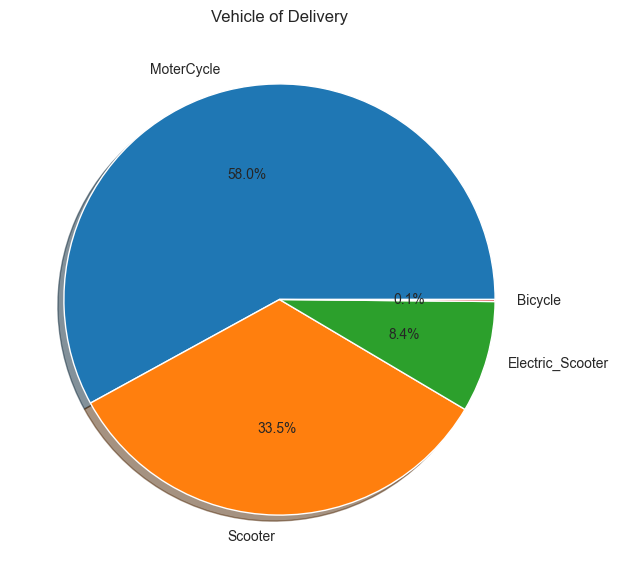

In [14]:
plt.figure(figsize = (12,7))
plt.pie(vc_types, labels =['MoterCycle','Scooter','Electric_Scooter','Bicycle'], autopct = '%1.1f%%',shadow = True)
plt.title("Vehicle of Delivery")
plt.show()

### The Most Used Vehicle is "MoterCycle".

##  Find highst rating of vehicle.

In [15]:
vc_rating = df[['Delivery_person_Age','Delivery_person_Ratings','Type_of_vehicle']].sort_values(by = 'Delivery_person_Ratings',ascending = False)
vc_rating

,Delivery_person_Age,Delivery_person_Ratings,Type_of_vehicle
5169,50,6.0,scooter
17145,50,6.0,electric_scooter
3586,50,6.0,electric_scooter
28974,50,6.0,electric_scooter
45332,50,6.0,electric_scooter
...,...,...,...
25873,15,1.0,scooter
15124,15,1.0,bicycle
11125,15,1.0,scooter
41241,15,1.0,scooter


In [16]:
vc_rating = df[['Delivery_person_Ratings','Type_of_vehicle']].groupby('Type_of_vehicle')[['Delivery_person_Ratings']].mean()
vc_rating.sort_values(by = "Type_of_vehicle",ascending = True)


,Delivery_person_Ratings
Type_of_vehicle,
bicycle,4.320588
electric_scooter,4.641846
motorcycle,4.626253
scooter,4.641968


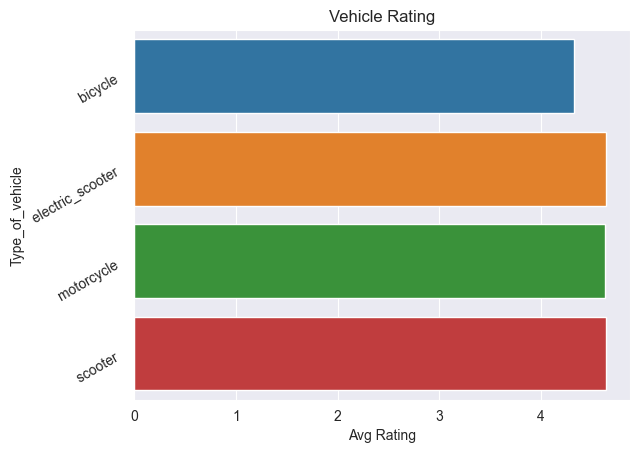

In [21]:
# vc_rating.plot.barh(legend = False,color = "hotpink")
sns.barplot(x='Delivery_person_Ratings',y='Type_of_vehicle', data=vc_rating,hue = 'Type_of_vehicle',)
plt.xlabel("Avg Rating")
plt.title('Vehicle Rating')
plt.yticks(rotation =30)
plt.show()


## Now here we can see the Highest avg rating goes to "Scooter".